# OECD Data

In [1]:
from utils.oecd import get_oecd_data

## Gasto en pensiones públicas


### Porcentaje del PIB

OECD. [Public expenditure on old-age and survivors cash benefits in % GDP](https://data-explorer.oecd.org/vis?lc=en&df[ds]=DisseminateFinalDMZ&df[id]=DSD_SOCX_AGG%40DF_PUB_OLD&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A..PT_B1GQ....&pd=%2C&to[TIME_PERIOD]=false&vw=tb)

In [2]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_B1GQ...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]
df

,OBS_VALUE,REF_AREA
TIME_PERIOD,,
1981-01-01,NaN,AUT
1982-01-01,NaN,AUT
1983-01-01,NaN,AUT
1984-01-01,NaN,AUT
1986-01-01,NaN,AUT
...,...,...
2017-01-01,7.908,ROU
2018-01-01,7.740,ROU
2019-01-01,7.682,ROU


<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del PIB'>

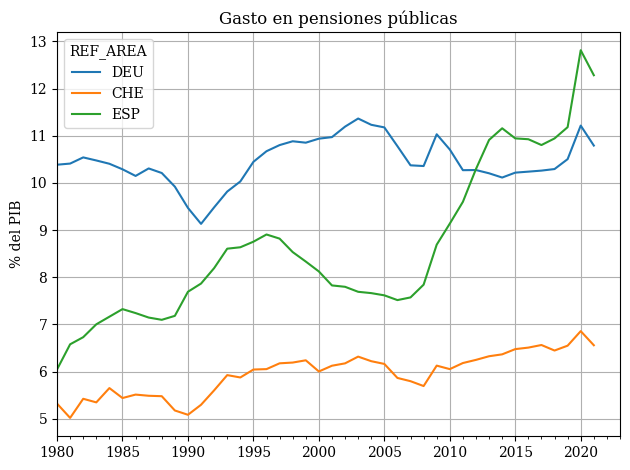

In [3]:
df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del PIB', xlabel='')

## Porcentaje del gasto público

<Axes: title={'center': 'Gasto en pensiones públicas'}, ylabel='% del gasto público'>

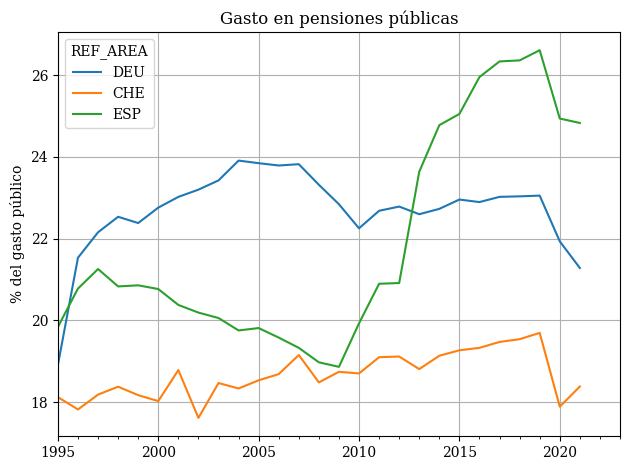

In [4]:
id = "OECD.ELS.SPD,DSD_SOCX_AGG@DF_PUB_OLD,1.0/.A..PT_OTE_S13...."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA"]]

df.pivot_table(
    index="TIME_PERIOD",
    columns="REF_AREA",
    values="OBS_VALUE"
).plot(y=['DEU', 'CHE', 'ESP'], title='Gasto en pensiones públicas', ylabel='% del gasto público', xlabel='', xlim=['1995', None])

## Valor presente de las pensiones

OECD. [Pension wealth](https://data-explorer.oecd.org/vis?lc=en&tm=pension&pg=0&snb=177&vw=ov&df[ds]=dsDisseminateFinalDMZ&df[id]=DSD_PAG%40DF_PW&df[ag]=OECD.ELS.SPD&df[vs]=1.0&dq=.A.....&pd=2022%2C2022&to[TIME_PERIOD]=true&isAvailabilityDisabled=false)

In [5]:
id = "OECD.ELS.SPD,DSD_PAG@DF_PW,1.0/.A....."

df = get_oecd_data(id)[["OBS_VALUE", "REF_AREA", "SEX", "MEASURE"]]

# Average by sex
df_avg = df.groupby(["REF_AREA", "MEASURE"], as_index=False).OBS_VALUE.mean()

df_wide = df_avg.pivot(columns=["REF_AREA", "MEASURE"], values="OBS_VALUE")
df_wide.columns = [f"{ref}_{meas}" for ref, meas in df_wide.columns]
df_wide

,ARG_GPW100,ARG_GPW200,ARG_GPW50,ARG_NPW100,ARG_NPW200,ARG_NPW50,AUS_GPW100,AUS_GPW200,AUS_GPW50,AUS_NPW100,...,USA_GPW50,USA_NPW100,USA_NPW200,USA_NPW50,ZAF_GPW100,ZAF_GPW200,ZAF_GPW50,ZAF_NPW100,ZAF_NPW200,ZAF_NPW50
0,17.55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,14.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,24.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,20.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,16.25,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,NaN,NaN
308,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3.1,NaN,NaN,NaN
309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.8,NaN,NaN
310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
